In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tpot
import sklearn

In [4]:
mean = pd.read_pickle("../dataset_means_stds/vdw_mean.pkl")
std = pd.read_pickle("../dataset_means_stds/vdw_std.pkl")
data_train_scaled = pd.read_csv("../scaled_featurized_train/scaled_vdw_train.csv", index_col=0).dropna(axis=1)
data_test_scaled = pd.read_csv("../scaled_featurized_test/scaled_vdw_test.csv", index_col=0).dropna(axis=1)
data_train = (data_train_scaled * std) + mean
data_test = (data_test_scaled * std) + mean

data_train.head()

,energy_vdw_per_atom (eV/atom),ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,...,sine_eigenspectrum_30,sine_eigenspectrum_31,sine_eigenspectrum_32,sine_eigenspectrum_33,sine_eigenspectrum_34,sine_eigenspectrum_35,sine_eigenspectrum_36,sine_eigenspectrum_37,sine_eigenspectrum_38,sine_eigenspectrum_39
945,-2.780988,14.233333,27.637000,1859.066667,11.733333,80.700000,1.790000,23.463333,2.956667,2.829190,...,1.421085e-14,1.776357e-15,1.243450e-14,1.421085e-14,1.065814e-14,1.776357e-15,8.881784e-16,7.993606e-15,1.065814e-14,3.388132e-19
2797,-4.240717,18.250000,85.246978,645.678333,55.336354,237.183333,4.060667,22.886667,2.850000,1.725936,...,1.421085e-14,1.776357e-15,1.243450e-14,1.421085e-14,1.065814e-14,1.776357e-15,8.881784e-16,7.993606e-15,1.065814e-14,3.388132e-19
3481,-4.537545,17.525000,44.186942,811.120000,50.128020,526.850000,2.490000,53.845000,2.465000,1.129038,...,1.421085e-14,1.776357e-15,1.243450e-14,1.421085e-14,1.065814e-14,1.776357e-15,8.881784e-16,7.993606e-15,1.065814e-14,3.388132e-19
651,-4.148780,22.442857,82.475954,1268.785714,13.071429,876.428571,3.505714,59.285714,2.462857,2.490277,...,1.421085e-14,1.776357e-15,1.243450e-14,1.421085e-14,1.065814e-14,1.776357e-15,8.881784e-16,7.993606e-15,1.065814e-14,3.388132e-19
345,-2.785042,16.000000,97.195000,2505.500000,69.268969,434.500000,6.007000,40.815000,2.030000,1.139356,...,1.421085e-14,1.776357e-15,1.243450e-14,1.421085e-14,1.065814e-14,1.776357e-15,8.881784e-16,7.993606e-15,1.065814e-14,3.388132e-19


In [3]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=1/60,
    max_time_mins=10,
    cv=10,
    verbosity=2,
    scoring="neg_root_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=-1,
    random_state=1234
)

In [5]:
target = "energy_vdw_per_atom (eV/atom)"
train_x = data_train_scaled.drop(columns=[target]).to_numpy()
train_y = data_train_scaled[target].to_numpy().ravel()

test_x = data_test_scaled.drop(columns=[target]).to_numpy()
test_y = data_test_scaled[target].to_numpy().ravel()

model.fit(train_x, train_y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3693392269429053

Generation 2 - Current best internal CV score: -0.3693392269429053

Generation 3 - Current best internal CV score: -0.3693392269429053

Generation 4 - Current best internal CV score: -0.3693392269429053

Generation 5 - Current best internal CV score: -0.3693392269429053

Generation 6 - Current best internal CV score: -0.3693392269429053

Generation 7 - Current best internal CV score: -0.3693392269429053

Generation 8 - Current best internal CV score: -0.3693392269429053

Generation 9 - Current best internal CV score: -0.3693392269429053

Generation 10 - Current best internal CV score: -0.3693392269429053

Generation 11 - Current best internal CV score: -0.3693392269429053

Generation 12 - Current best internal CV score: -0.3693392269429053

Generation 13 - Current best internal CV score: -0.3629633842080769

Generation 14 - Current best internal CV score: -0.3468658150171384

Generation 15 - Current best internal CV s

TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [6]:
def unscale(arr):
    return arr * std[target] + mean[target]
    
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [7]:
models = {}

models["r1_1term"] = lambda df: 9.027012811387233e-04 + 5.652128235876568e-01 * (df["ave:gs_energy"] - df["ave:en_ghosh"])
models["r1_2term"] = lambda df: 1.801668309432753e-03 + 3.416811904296799e-01 * (df["ave:first_ion_en"]  + df["ave:density"]) + \
                                6.772451781519770e-01 * (df["ave:gs_energy"] - df["ave:en_ghosh"])
models["r2_1term"] = lambda df: -8.613014913447112e-01 + 6.775861689045741e-01 * ((df["ave:gs_energy"]  - df["ave:en_ghosh"]) + np.exp(-df["ave:c6_gb"]))

data_train_scaled_sisso = data_train_scaled.copy()
data_test_scaled_sisso = data_test_scaled.copy()
for key,fun in models.items():
    data_train_scaled_sisso[key] = fun(data_train_scaled_sisso)
    data_test_scaled_sisso[key] = fun(data_test_scaled_sisso)

data_train_scaled_sisso.head()

,energy_vdw_per_atom (eV/atom),ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:density,ave:dipole_polarizability,ave:electron_negativity,ave:electron_affinity,...,sine_eigenspectrum_33,sine_eigenspectrum_34,sine_eigenspectrum_35,sine_eigenspectrum_36,sine_eigenspectrum_37,sine_eigenspectrum_38,sine_eigenspectrum_39,r1_1term,r1_2term,r2_1term
945,0.681979,-0.486158,-1.055898,0.512365,-1.338436,-0.822847,-1.122199,-0.703578,1.010020,1.524615,...,-0.049327,-0.047533,-0.046918,-0.034009,-0.033951,-0.033645,-0.016855,-0.455883,-0.577178,0.133942
2797,-0.160730,0.496075,0.398775,-0.999540,-0.207990,-0.511562,-0.203783,-0.723138,0.794986,0.143665,...,-0.049327,-0.047533,-0.046918,-0.034009,-0.033951,-0.033645,-0.016855,-0.324233,-0.292454,-0.120938
3481,-0.332090,0.318784,-0.638006,-0.793397,-0.343021,0.064659,-0.839070,0.326955,0.018849,-0.603476,...,-0.049327,-0.047533,-0.046918,-0.034009,-0.033951,-0.033645,-0.016855,0.138898,-0.123108,-0.060711
651,-0.107654,1.521393,0.328805,-0.223136,-1.303745,0.760060,-0.428245,0.511502,0.014529,1.100396,...,-0.049327,-0.047533,-0.046918,-0.034009,-0.033951,-0.033645,-0.016855,0.660260,0.636834,0.246012
345,0.679639,-0.054139,0.700466,1.317833,0.153225,-0.119049,0.583449,-0.115017,-0.858085,-0.590561,...,-0.049327,-0.047533,-0.046918,-0.034009,-0.033951,-0.033645,-0.016855,0.359162,0.298038,0.331435


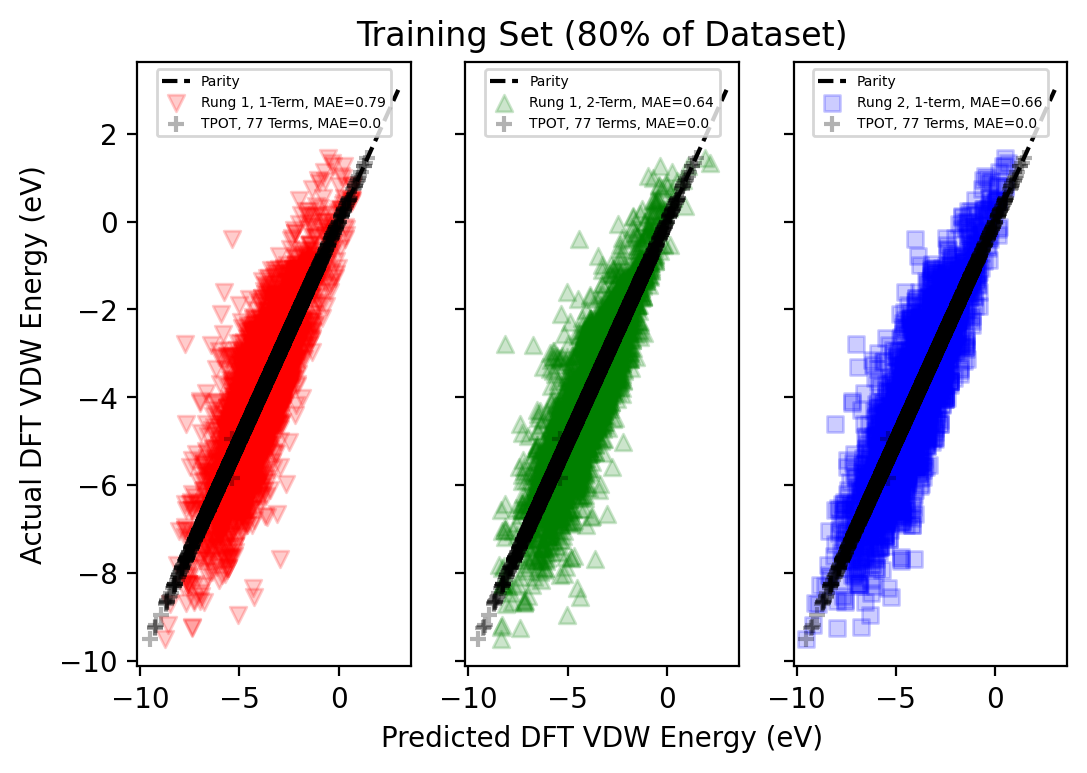

In [16]:
tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(train_pred_y)),2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_1term"])),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_2term"])),2)
r2_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("Actual DFT VDW Energy (eV)")
ax2.set_xlabel("Predicted DFT VDW Energy (eV)")


    
ax1.scatter(x=unscale(data_train_scaled_sisso["r1_1term"]), y=unscale(train_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mae}")
ax2.scatter(x=unscale(data_train_scaled_sisso["r1_2term"]), y=unscale(train_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mae}")
ax3.scatter(x=unscale(data_train_scaled_sisso["r2_1term"]), y=unscale(train_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mae}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(train_pred_y), y=unscale(train_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 77 Terms, MAE={tpot_mae}")
    ax.plot([0, 3], [0, 3], color="black", linestyle="--", label="Parity")
    
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

ax2.set_title("Training Set (80% of Dataset)")
plt.show()

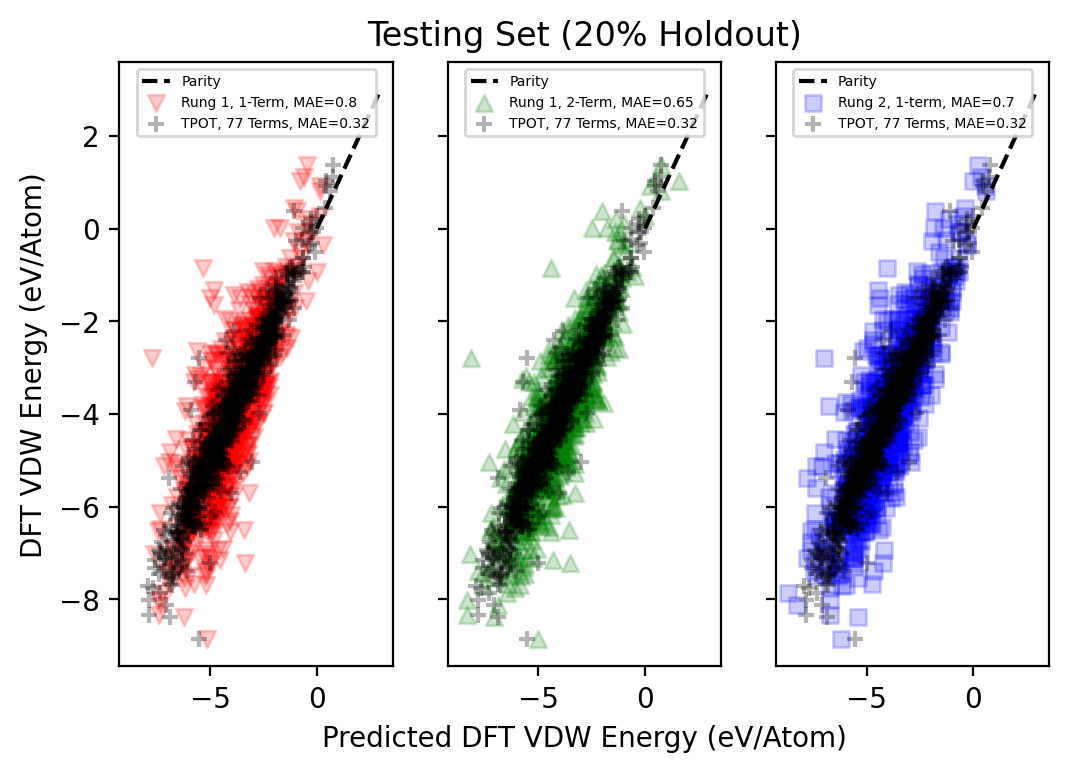

In [17]:
tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(test_pred_y)),2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_1term"])),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_2term"])),2)
r2_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("DFT VDW Energy (eV/Atom)")
ax2.set_xlabel("Predicted DFT VDW Energy (eV/Atom)")
 
ax1.scatter(x=unscale(data_test_scaled_sisso["r1_1term"]), y=unscale(test_y), marker="v", color="red",alpha=0.2, label=f"Rung 1, 1-Term, MAE={r1_1t_mae}")
ax2.scatter(x=unscale(data_test_scaled_sisso["r1_2term"]), y=unscale(test_y), marker="^", color="green", alpha=0.2, label=f"Rung 1, 2-Term, MAE={r1_2t_mae}")
ax3.scatter(x=unscale(data_test_scaled_sisso["r2_1term"]), y=unscale(test_y), marker="s", color="blue", alpha=0.2, label=f"Rung 2, 1-term, MAE={r2_1t_mae}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(test_pred_y), y=unscale(test_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 77 Terms, MAE={tpot_mae}")
    ax.plot([0, 3], [0, 3], color="black", linestyle="--", label="Parity")

ax2.set_title("Testing Set (20% Holdout)")
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="upper center")

plt.show()

In [15]:
data_train.shape

(3520, 77)

###### 